In [297]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import zscore, norm
import os 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

In [298]:
data_frame = pd.read_excel('/Users/salvatoreprioli/Documents/ML_/chemometrics/data-sets/Datasets_1.xlsx', sheet_name=0, index_col=0, usecols=['lake', 'Chlaμgl', 'TPmgl', 'DOCmgL', 'PCugL'])
save_to_path = '/Users/salvatoreprioli/Documents/ML_/notes/Reports'

In [301]:
distribution_data = pd.DataFrame(columns=data_frame.keys())
for i in data_frame.keys():
    distribution_data.at['Mean', i] = data_frame[i].mean()
    distribution_data.at['Median', i] = data_frame[i].median()
    distribution_data.at['Mean-Median', i] = data_frame[i].mean()-data_frame[i].median()
    distribution_data.at['Kurtosis', i] = data_frame[i].kurtosis() #using fisher definition
    distribution_data.at['Skewness', i] = data_frame[i].skew() 
distribution_data.to_latex(os.path.join(save_to_path,'distribution_tab.tex'))
distribution_data

,Chlaμgl,PCugL,DOCmgL,TPmgl
Mean,41.646468,2.500535,5.957451,0.083263
Median,25.812133,1.39362,5.378875,0.059886
Mean-Median,15.834335,1.106915,0.578576,0.023377
Kurtosis,1.799239,17.333973,4.421073,3.713023
Skewness,1.571456,3.735184,2.040527,1.879541


/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Library/anaconda3/lib/py

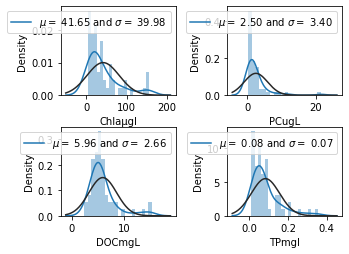

In [290]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(w=4.7747, h=3.5) #based on latex doc
fig.tight_layout()
j=0
for a in [0,1]:
    for b in [0,1]:
        (mu, sigma) = norm.fit(data_frame.iloc[:, j])
        sns.distplot(data_frame.iloc[:, j], bins=20, ax=axes[a,b], fit=norm)
        axes[a,b].legend(['$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)], loc='best')
        j+=1
plt.savefig(os.path.join(save_to_path,'distribution_plot.pgf'))

In [291]:
# Outlers present but it's better to not remove them before transform the data
# Q1 = data_frame.quantile(0.25)
# Q3 = data_frame.quantile(0.75)
# IQR = Q3 - Q1
# data_frame_no_outliers = data_frame[~((data_frame < (Q1 - 1.5 * IQR)) |(data_frame > (Q3 + 1.5 * IQR))).any(axis=1)]

In [303]:
log_data_frame = np.log10(data_frame) 
distribution_log_data = pd.DataFrame(columns=log_data_frame.keys())
for i in log_data_frame.keys():
    distribution_log_data.at['Mean', i] = log_data_frame[i].mean()
    distribution_log_data.at['Median', i] = log_data_frame[i].median()
    distribution_log_data.at['Mean-Median', i] = log_data_frame[i].mean()-log_data_frame[i].median()
    distribution_log_data.at['Kurtosis', i] = log_data_frame[i].kurtosis() #using fisher definition
    distribution_log_data.at['Skewness', i] = log_data_frame[i].skew() 
distribution_log_data.to_latex(os.path.join(save_to_path,'log_distribution_tab.tex'))
distribution_log_data

,Chlaμgl,PCugL,DOCmgL,TPmgl
Mean,1.428157,0.176517,0.742226,-1.222298
Median,1.411774,0.144117,0.730686,-1.222693
Mean-Median,0.016382,0.0324,0.011539,0.000395
Kurtosis,-0.485844,0.060878,1.228027,-0.348265
Skewness,-0.115639,0.480831,0.817147,-0.018665


/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Library/anaconda3/lib/py

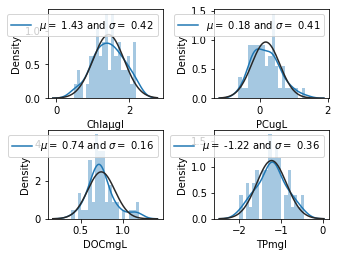

In [304]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(w=4.7747, h=3.5) #based on latex doc
fig.tight_layout()
j=0
for a in [0,1]:
    for b in [0,1]:
        (mu, sigma) = norm.fit(log_data_frame.iloc[:, j])
        sns.distplot(log_data_frame.iloc[:, j], bins=20, ax=axes[a,b], fit=norm)
        axes[a,b].legend(['$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)], loc='best')
        j+=1
plt.savefig(os.path.join(save_to_path,'log_distribution_plot.pgf'))


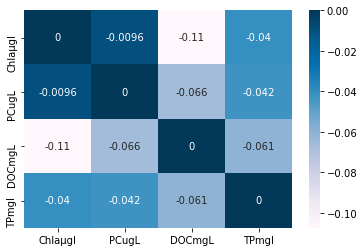

In [307]:
plt.figure()
fig.set_size_inches(w=4.7747, h=3.5) #based on latex doc
cor = log_data_frame.corr(method='pearson')-log_data_frame.corr(method='spearman')
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.savefig(os.path.join(save_to_path,'correlation_diff_plot.pgf'))


In [305]:
log_data_frame.apply(zscore).style.applymap(lambda x: 'background-color : red' if abs(x)>3 else '')
#to remove outliers
# z_scores = zscore(log_data_frame)
# filtered_entries = (np.abs(z_scores) < 3).all(axis=1)
# new_df = data_frame[filtered_entries]

,Chlaμgl,PCugL,DOCmgL,TPmgl
lake,,,,
Wangtian,-0.546811,-1.963161,0.085998,-0.609235
Wu,-0.485768,-1.744710,0.627699,-0.130714
Taibai,0.280452,-1.611731,-0.244032,0.484654
Sanshan,-0.774945,-1.328396,-0.729992,-1.528695
Baojie,-1.937118,-1.057475,0.144681,-2.156824
Lu,-1.010188,-1.044693,-0.907423,-1.250674
Fengsha,-2.036033,-1.042083,2.663464,-0.219140
Chen,0.352303,-1.027334,-0.384890,0.396685
Longwo,-2.244091,-1.021726,-0.930990,-1.532147


In [158]:
X = log_data_frame.drop(['Chlaμgl', 'PCugL', 'DOCmgL'], axis=1) 
y = log_data_frame['Chlaμgl']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44, 1)
(12, 1)
(44,)
(12,)


In [160]:
Chla_TP_model = LinearRegression() 
Chla_TP_model.fit(X_train, y_train)

LinearRegression()

In [161]:
predictions = Chla_TP_model.predict(X_test)  

print("Actual Chlorophyll concentration: ", y_test[0]) 
print("Model Predicted concentration: ", predictions[0])

Actual Chlorophyll concentration:  1.1962341239652075
Model Predicted concentration:  1.1983580954962698


In [162]:
mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

In [163]:
print('The coefficient is {}'.format(Chla_TP_model.coef_))
print('The intercept is {}'.format(Chla_TP_model.intercept_))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2))

The coefficient is [1.0654903]
The intercept is 2.73250874025976
Root mean squared error of the model is 0.22926179583424752.
R-squared score is 0.5509791479697037.


In [165]:
X = log_data_frame.drop(['Chlaμgl'], axis=1) 
y = log_data_frame['Chlaμgl']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44, 3)
(12, 3)
(44,)
(12,)


In [167]:
Chla_TP_PCmodel = LinearRegression() 
Chla_TP_PCmodel.fit(X_train, y_train)

LinearRegression()

In [168]:
predictions = Chla_TP_PCmodel.predict(X_test)  

print("Actual Chlorophyll concentration: ", y_test[0]) 
print("Model Predicted concentration: ", predictions[0])

Actual Chlorophyll concentration:  1.1962341239652075
Model Predicted concentration:  1.0916424980383386


In [169]:
mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print('The coefficient is {}'.format(Chla_TP_PCmodel.coef_))
print('The intercept is {}'.format(Chla_TP_PCmodel.intercept_))
print('Root mean squared error of the model is {}.'.format(rmse))
print('R-squared score is {}.'.format(r2))

The coefficient is [ 0.1357634  -0.25870959  1.01854803]
The intercept is 2.8399911806945974
Root mean squared error of the model is 0.19695495516243297.
R-squared score is 0.6686118664787162.


In [198]:
# import plotly.express as px
# fig = px.scatter_3d(log_data_frame, x='PCugL', y='Chlaμgl', z='TPmgl')
# # fig = px.line_3d([1,2],[23,4])
# fig.show()

In [265]:
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))
df.apply(find_iqr)


rating      6.75
points      5.75
assists     2.50
rebounds    3.75
dtype: float64